# Task 1

Dado que queremos dividir os números em 6 intervalos de igual largura, calcule essa largura de intervalo. Arredonde para o número inteiro mais próximo, maior que o resultado obtido

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('DadosEx1.csv')
display(df)

FileNotFoundError: [Errno 2] No such file or directory: 'DadosEx1.csv'

Fómula usada para calcular intervalos

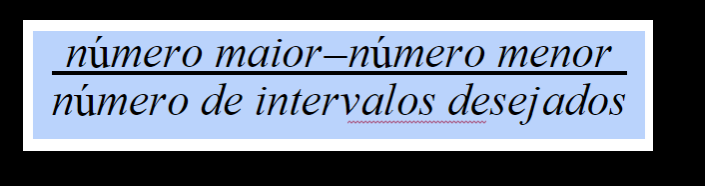

In [ ]:
# encontrando os valores máximos e mínimos 
min = df['Dataset'].min()
max = df['Dataset'].max()

# Calculando a largura do intervalo e arredondando para o próximo inteiro maior
largura_intervalo = (max - min) / 6
largura_intervalo_arredondada = int(largura_intervalo) + (1 if largura_intervalo % 1 > 0 else 0)

print(f'Valor Mínimo: {min}\nValor Máximo: {max}\nLargura do intervalo: {largura_intervalo}\nLargura do intervalo arredondada: {largura_intervalo_arredondada}')


Valor Mínimo: 8
Valor Máximo: 282
Largura do intervalo: 45.666666666666664
Largura do intervalo arredondada: 46


# Task 2

Crie uma tabela de distribuição de frequência que mostre	
1. Os intervalos
2. A frequência absoluta de cada intervalo
3. A frequência relativa de cada intervalo

## 1. Os intervalos

In [ ]:
# Calcular os intervalos com base na largura de intervalo arredondada
intervalos = range(min, max + largura_intervalo_arredondada, largura_intervalo_arredondada)
print(intervalos)
intervalos_lista = list(intervalos)

# lista de strings representando cada intervalo
intervalos_str = [f"{intervalos_lista[i]} - {intervalos_lista[i+1]-1}" for i in range(len(intervalos_lista)-1)]

df_intervalos = pd.DataFrame({'Intervalos': intervalos_str})
display(df_intervalos)


range(8, 328, 46)


,Intervalos
0,8 - 53
1,54 - 99
2,100 - 145
3,146 - 191
4,192 - 237
5,238 - 283


## 2. A frequência absoluta de cada intervalo

In [ ]:
# Utilizar o pd.cut para categorizar os dados em intervalos e calcular a frequência absoluta
df['Intervalo'] = pd.cut(df['Dataset'], bins=intervalos_lista)

# Calcular a frequência absoluta de cada intervalo
frequencia_absoluta = df['Intervalo'].value_counts()

display(frequencia_absoluta)


Intervalo
(238, 284]    8
(8, 54]       3
(146, 192]    3
(54, 100]     2
(100, 146]    2
(192, 238]    1
Name: count, dtype: int64

## 3. A frequência relativa de cada intervalo

In [ ]:
# Calcular a frequência relativa de cada intervalo (frequência absoluta / total de dados)
frequencia_relativa = frequencia_absoluta / len(df) * 100

display(frequencia_relativa)


Intervalo
(238, 284]    40.0
(8, 54]       15.0
(146, 192]    15.0
(54, 100]     10.0
(100, 146]    10.0
(192, 238]     5.0
Name: count, dtype: float64

# Task 3

Repita as tarefas 1 e 2, mas desta vez, use a largura exata do intervalo. Não arredonde para o número inteiro mais próximo.

In [ ]:

largura_intervalo_exata_ajustada = (max - min) / 6
intervalos_exatos_ajustados = [min + i * largura_intervalo_exata_ajustada for i in range(7)]

intervalos_exatos_str_ajustados = [f"{intervalos_exatos_ajustados[i]} - {intervalos_exatos_ajustados[i+1]}" for i in range(len(intervalos_exatos_ajustados)-1)]


df['Intervalo_Exato_Ajustado'] = pd.cut(df['Dataset'], bins=intervalos_exatos_ajustados, include_lowest=True, right=False)

frequencia_absoluta_exata_ajustada = df['Intervalo_Exato_Ajustado'].value_counts().sort_index()

df_intervalos_exatos_ajustados = pd.DataFrame({
    'Intervalos_Exatos': intervalos_exatos_str_ajustados,
    'Frequência_Absoluta': frequencia_absoluta_exata_ajustada.values
})

df_intervalos_exatos_ajustados



,Intervalos_Exatos,Frequência_Absoluta
0,8.0 - 53.666666666666664,3
1,53.666666666666664 - 99.33333333333333,3
2,99.33333333333333 - 145.0,2
3,145.0 - 190.66666666666666,3
4,190.66666666666666 - 236.33333333333331,1
5,236.33333333333331 - 282.0,7
